# Libraries

In [1]:
import sys
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPYDEV'
# path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY'
path = r'C:\Users\wander\Documents\GitHub\PAREPYDEV_NEW'
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

# Run

In [ ]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': 'sdsdsd',
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

19:50:31 - Checking inputs completed!
19:50:31 - Started State Limit Function evaluation (g)...


In [ ]:
pf_list = pf.values.flatten().tolist()
beta_list = beta.values.flatten().tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"State Limite function (g): {i}, pf: {p:.6f}, beta: {b:.6f}")

Index: 0, pf: 0.000000, beta: 21.589144


In [2]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': 'sdsdsd',
        }

# Call algorithm
results = sampling_algorithm_structural_analysis_kernel(setup)

In [7]:
from tabulate import tabulate
table = tabulate(results, headers='keys', tablefmt='psql')
print(table)

+-----+---------+----------+----------+---------+---------+------------+-------+
|     |     X_0 |      X_1 |      X_2 |     R_0 |     S_0 |        G_0 |   I_0 |
|-----+---------+----------+----------+---------+---------+------------+-------|
|   0 | 33.9686 | 10.9885  | 0.289494 | 2717.48 | 2281.71 |  435.773   |     0 |
|   1 | 41.6526 |  8.38575 | 0.242897 | 3332.21 | 1869.4  | 1462.8     |     0 |
|   2 | 52.0513 |  9.42486 | 0.195777 | 4164.1  | 1650.72 | 2513.39    |     0 |
|   3 | 37.6799 |  9.91397 | 0.254184 | 3014.39 | 2017.75 |  996.637   |     0 |
|   4 | 31.1943 |  8.96956 | 0.250925 | 2495.54 | 1947.75 |  547.791   |     0 |
|   5 | 36.3056 | 10.1379  | 0.242374 | 2904.45 | 1960.97 |  943.48    |     0 |
|   6 | 39.6597 |  9.65011 | 0.206588 | 3172.78 | 1725.93 | 1446.85    |     0 |
|   7 | 42.368  | 10.0305  | 0.275783 | 3389.44 | 2150.01 | 1239.43    |     0 |
|   8 | 42.7668 | 10.03    | 0.21094  | 3421.35 | 1771.82 | 1649.52    |     0 |
|   9 | 43.0856 |  9.85498 |

In [4]:
# results.to_excel('data_results.xlsx')
results_filtered = results[results['G_0'] < 0]
results_filtered

,X_0,X_1,X_2,R_0,S_0,G_0,I_0
549,27.369342,12.466704,0.29067,2189.54736,2368.388139,-178.840779,1.0


In [5]:
a = []
for coluna in pf:
    a += pf[coluna].to_list()

a


[0.001]

In [26]:
table = tabulate(results, headers='keys', tablefmt='grid')
print(results)

NameError: name 'tabulate' is not defined

C:\Users\wander\AppData\Local\Temp\ipykernel_21984\3611791916.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


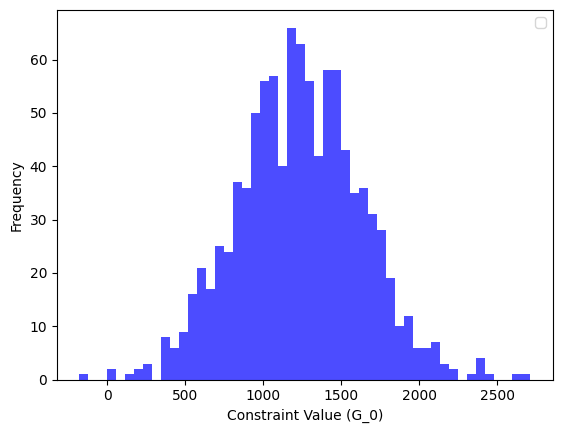

Most Probable Points Near Failure (G_0 >= 0):
           X_0        X_1       X_2          R_0          S_0         G_0  I_0
243  29.906084  10.515635  0.309908  2392.486704  2375.230323   17.256381  0.0
434  25.953240   9.285866  0.261883  2076.259171  2028.738167   47.521004  0.0
78   30.661788   9.748584  0.308509  2452.943025  2325.647527  127.295498  0.0
Most Probable Points Near Failure (G_0 <= 0):
           X_0        X_1      X_2         R_0          S_0         G_0  I_0
549  27.369342  12.466704  0.29067  2189.54736  2368.388139 -178.840779  1.0


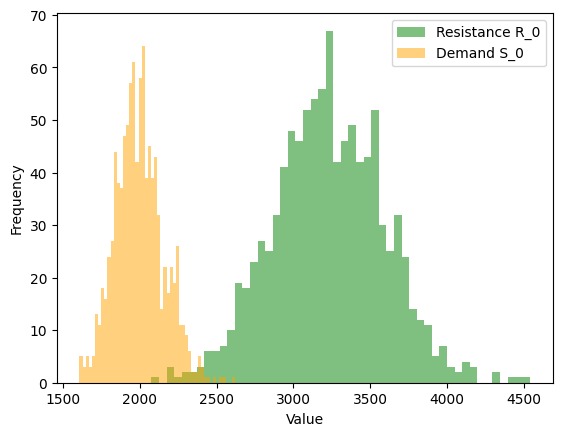

I_0 - p_f: 0.001000, β: 3.090232


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Plot histogram of G_0
plt.hist(results['G_0'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Constraint Value (G_0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Find the three most probable points near zero for G_0
## 2.1 Sort the results by G_0 >=0
sorted_positive = results[results['G_0'] >= 0].sort_values(by='G_0', ascending=True)
print('Most Probable Points Near Failure (G_0 >= 0):')
print(sorted_positive.head(3))

## 2.2 Sort the results by G_0 <=0
sorted_negative = results[results['G_0'] <= 0].sort_values(by='G_0', ascending=False)
print('Most Probable Points Near Failure (G_0 <= 0):')
print(sorted_negative.head(3))


# 3. Overlay histograms for R_0 and S_0
plt.hist(results['R_0'], bins=50, alpha=0.5, color='green', label='Resistance R_0')
plt.hist(results['S_0'], bins=50, alpha=0.5, color='orange', label='Demand S_0')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Convert pf and beta to lists
pf_list = pf.iloc[:, :].values.flatten().tolist()
beta_list = beta.iloc[:, :].values.flatten().tolist()

# 5. Iterate through reliability results for constraints
for pf_column, beta_column, (pf_value, beta_value) in zip(pf.columns, beta.columns, zip(pf_list, beta_list)):
    print(f"{pf_column} - p_f: {pf_value:.6f}, β: {beta_value:.6f}")


In [8]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_time_example
import numpy as np

# Dataset
f = {'type': 'normal', 
    'parameters': {'mean': 40.3, 'sigma': 4.64}, 
    'stochastic variable': False, 
    }

p = {'type': 'gumbel max',
    'parameters': {'mean': 10.2, 'sigma': 1.12}, 
    'stochastic variable': False, 
    }

w = {'type': 'lognormal',
    'parameters': {'mean': 0.25, 'sigma': 0.025}, 
    'stochastic variable': False, 
    }

# PAREpy setup
setup = {
             'number of samples': 70000, 
             'numerical model': {'model sampling': 'mcs-time', 'time steps': 5}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': {'time analysis': list(np.linspace(0, 50, num=5, endpoint=True))},
             'objective function': nowak_collins_time_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

19:08:05 - Checking inputs completed!
19:08:05 - Started State Limit Function evaluation (g)...
19:08:15 - Finished State Limit Function evaluation (g) in 1.06e+01 seconds!
19:08:15 - Started evaluation beta reliability index and failure probability...
19:08:16 - Finished evaluation beta reliability index and failure probability in 3.26e-02 seconds!
19:08:16 - Voilà!!!!....simulation results were not saved in a text file!


In [9]:
results

,X_0_t=0,X_0_t=1,X_0_t=2,X_0_t=3,X_0_t=4,X_1_t=0,X_1_t=1,X_1_t=2,X_1_t=3,X_1_t=4,X_2_t=0,X_2_t=1,X_2_t=2,X_2_t=3,X_2_t=4,STEP_t_0,STEP_t_1,STEP_t_2,STEP_t_3,STEP_t_4,R_0_t=0,R_0_t=1,R_0_t=2,R_0_t=3,R_0_t=4,S_0_t=0,S_0_t=1,S_0_t=2,S_0_t=3,S_0_t=4,G_0_t=0,G_0_t=1,G_0_t=2,G_0_t=3,G_0_t=4,I_0_t=0,I_0_t=1,I_0_t=2,I_0_t=3,I_0_t=4
0,35.714378,35.714378,35.714378,35.714378,35.714378,11.064585,11.064585,11.064585,11.064585,11.064585,0.267113,0.267113,0.267113,0.267113,0.267113,0.0,1.0,2.0,3.0,4.0,2857.150254,2856.693110,2856.921682,2856.997873,2857.035968,2155.292377,2155.292377,2155.292377,2155.292377,2155.292377,701.857877,701.400733,701.629305,701.705496,701.743591,0.0,0.0,0.0,0.0,0.0
1,42.049238,42.049238,42.049238,42.049238,42.049238,10.619766,10.619766,10.619766,10.619766,10.619766,0.317669,0.317669,0.317669,0.317669,0.317669,0.0,1.0,2.0,3.0,4.0,3363.939016,3363.400786,3363.669901,3363.759606,3363.804458,2426.114807,2426.114807,2426.114807,2426.114807,2426.114807,937.824209,937.285978,937.555093,937.644798,937.689651,0.0,0.0,0.0,0.0,0.0
2,44.023197,44.023197,44.023197,44.023197,44.023197,10.076683,10.076683,10.076683,10.076683,10.076683,0.257520,0.257520,0.257520,0.257520,0.257520,0.0,1.0,2.0,3.0,4.0,3521.855740,3521.292243,3521.573992,3521.667908,3521.714866,2045.997348,2045.997348,2045.997348,2045.997348,2045.997348,1475.858393,1475.294896,1475.576644,1475.670560,1475.717518,0.0,0.0,0.0,0.0,0.0
3,54.649943,54.649943,54.649943,54.649943,54.649943,9.367940,9.367940,9.367940,9.367940,9.367940,0.228944,0.228944,0.228944,0.228944,0.228944,0.0,1.0,2.0,3.0,4.0,4371.995420,4371.295901,4371.645660,4371.762247,4371.820540,1841.067944,1841.067944,1841.067944,1841.067944,1841.067944,2530.927476,2530.227956,2530.577716,2530.694302,2530.752596,0.0,0.0,0.0,0.0,0.0
4,36.410251,36.410251,36.410251,36.410251,36.410251,10.430382,10.430382,10.430382,10.430382,10.430382,0.255445,0.255445,0.255445,0.255445,0.255445,0.0,1.0,2.0,3.0,4.0,2912.820040,2912.353989,2912.587015,2912.664690,2912.703528,2052.993506,2052.993506,2052.993506,2052.993506,2052.993506,859.826534,859.360483,859.593509,859.671184,859.710021,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35.818307,35.818307,35.818307,35.818307,35.818307,10.768808,10.768808,10.768808,10.768808,10.768808,0.251780,0.251780,0.251780,0.251780,0.251780,0.0,1.0,2.0,3.0,4.0,2865.464543,2865.006069,2865.235306,2865.311719,2865.349925,2049.898513,2049.898513,2049.898513,2049.898513,2049.898513,815.566030,815.107556,815.336793,815.413206,815.451412,0.0,0.0,0.0,0.0,0.0
69996,38.952810,38.952810,38.952810,38.952810,38.952810,8.410968,8.410968,8.410968,8.410968,8.410968,0.240005,0.240005,0.240005,0.240005,0.240005,0.0,1.0,2.0,3.0,4.0,3116.224805,3115.726210,3115.975507,3116.058607,3116.100156,1853.902144,1853.902144,1853.902144,1853.902144,1853.902144,1262.322662,1261.824066,1262.073364,1262.156463,1262.198013,0.0,0.0,0.0,0.0,0.0
69997,45.809532,45.809532,45.809532,45.809532,45.809532,9.301554,9.301554,9.301554,9.301554,9.301554,0.289627,0.289627,0.289627,0.289627,0.289627,0.0,1.0,2.0,3.0,4.0,3664.762544,3664.176182,3664.469363,3664.567090,3664.615954,2191.387378,2191.387378,2191.387378,2191.387378,2191.387378,1473.375166,1472.788804,1473.081985,1473.179712,1473.228576,0.0,0.0,0.0,0.0,0.0
69998,40.525353,40.525353,40.525353,40.525353,40.525353,11.081921,11.081921,11.081921,11.081921,11.081921,0.236934,0.236934,0.236934,0.236934,0.236934,0.0,1.0,2.0,3.0,4.0,3242.028225,3241.509501,3241.768863,3241.855317,3241.898544,1980.221552,1980.221552,1980.221552,1980.221552,1980.221552,1261.806673,1261.287949,1261.547311,1261.633765,1261.676992,0.0,0.0,0.0,0.0,0.0


C:\Users\wander\AppData\Local\Temp\ipykernel_21984\2470366457.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


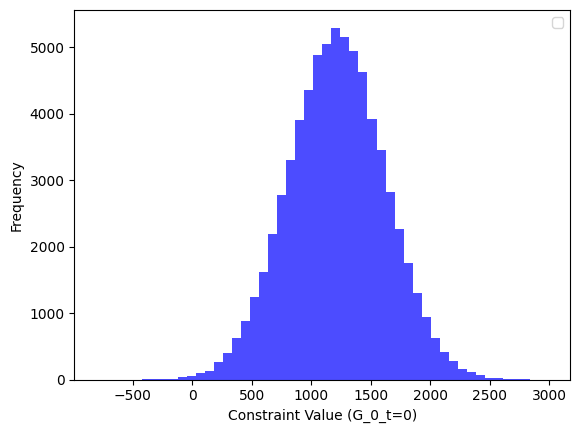

Most Probable Points Near Failure (G_0_t=0 >= 0):
         X_0_t=0    X_0_t=1    X_0_t=2    X_0_t=3    X_0_t=4    X_1_t=0  \
23444  30.207919  30.207919  30.207919  30.207919  30.207919  12.647814   
58521  25.436093  25.436093  25.436093  25.436093  25.436093  10.462102   
5314   30.225762  30.225762  30.225762  30.225762  30.225762  10.833267   

         X_1_t=1    X_1_t=2    X_1_t=3    X_1_t=4   X_2_t=0   X_2_t=1  \
23444  12.647814  12.647814  12.647814  12.647814  0.297181  0.297181   
58521  10.462102  10.462102  10.462102  10.462102  0.251935  0.251935   
5314   10.833267  10.833267  10.833267  10.833267  0.314176  0.314176   

        X_2_t=2   X_2_t=3   X_2_t=4  STEP_t_0  STEP_t_1  STEP_t_2  STEP_t_3  \
23444  0.297181  0.297181  0.297181       0.0       1.0       2.0       3.0   
58521  0.251935  0.251935  0.251935       0.0       1.0       2.0       3.0   
5314   0.314176  0.314176  0.314176       0.0       1.0       2.0       3.0   

       STEP_t_4      R_0_t=0      R_0_t

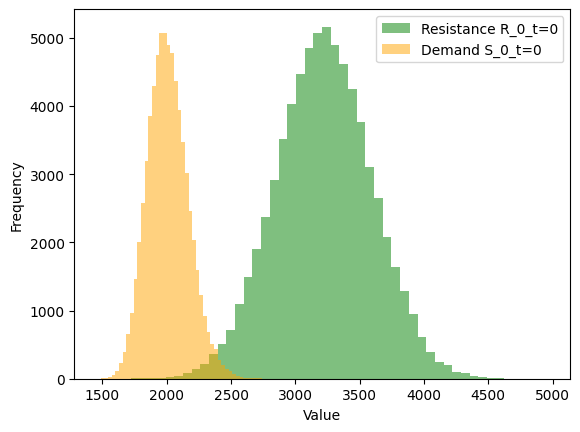

I_0 - p_f: 0.001471, β: 2.973645


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Plot histogram of G_0_t=0
plt.hist(results['G_0_t=0'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Constraint Value (G_0_t=0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Find the three most probable points near zero for G_0_t=0
## 2.1 Sort the results by G_0_t=0 >=0
sorted_positive = results[results['G_0_t=0'] >= 0].sort_values(by='G_0_t=0', ascending=True)
print('Most Probable Points Near Failure (G_0_t=0 >= 0):')
print(sorted_positive.head(3))

## 2.2 Sort the results by G_0_t=0 <=0
sorted_negative = results[results['G_0_t=0'] <= 0].sort_values(by='G_0_t=0', ascending=False)
print('Most Probable Points Near Failure (G_0_t=0 <= 0):')
print(sorted_negative.head(3))


# 3. Overlay histograms for R_0_t=0 and S_0_t=0
plt.hist(results['R_0_t=0'], bins=50, alpha=0.5, color='green', label='Resistance R_0_t=0')
plt.hist(results['S_0_t=0'], bins=50, alpha=0.5, color='orange', label='Demand S_0_t=0')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Convert pf and beta to lists
pf_list = pf.iloc[:, :].values.flatten().tolist()
beta_list = beta.iloc[:, :].values.flatten().tolist()

# 5. Iterate through reliability results for constraints
for pf_column, beta_column, (pf_value, beta_value) in zip(pf.columns, beta.columns, zip(pf_list, beta_list)):
    print(f"{pf_column} - p_f: {pf_value:.6f}, β: {beta_value:.6f}")
